Author: Jesus Ugarte

*   University of Central Florida
*   Algorithms for Machine Learning

Wine Prediction

In [1]:
import pandas as pd
import numpy as np # linear algebra
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline , Pipeline
from sklearn.model_selection import GridSearchCV , RandomizedSearchCV, train_test_split
from sklearn import preprocessing, decomposition, neighbors
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score
from sklearn import preprocessing

from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# IMPORTING DATA
wine_data = pd.read_csv('/content/drive/MyDrive/Assignment 2 -ML/train.csv').drop(columns=['id'])
sample_data = pd.read_csv('/content/drive/MyDrive/Assignment 2 -ML/sample_submission.csv').drop(columns=['id'])
test_data = pd.read_csv('/content/drive/MyDrive/Assignment 2 -ML/test.csv').drop(columns=['id'])
wine_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,8.5,0.40,0.40,6.3,0.050,3.0,10.0,0.99566,3.28,0.56,12.0,0
1,11.5,0.18,0.51,4.0,0.104,4.0,23.0,0.99960,3.28,0.97,10.1,1
2,8.2,0.34,0.37,1.9,0.057,43.0,74.0,0.99408,3.23,0.81,12.0,1
3,10.7,0.43,0.39,2.2,0.106,8.0,32.0,0.99860,2.89,0.50,9.6,0
4,7.6,0.42,0.25,3.9,0.104,28.0,90.0,0.99784,3.15,0.57,9.1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
794,6.6,0.96,0.00,1.8,0.082,5.0,16.0,0.99360,3.50,0.44,11.9,1
795,7.5,0.58,0.56,3.1,0.153,5.0,14.0,0.99476,3.21,1.03,11.6,1
796,5.6,0.31,0.78,13.9,0.074,23.0,92.0,0.99677,3.39,0.48,10.5,1
797,8.4,0.62,0.12,1.8,0.072,38.0,46.0,0.99504,3.38,0.89,11.8,1


In [3]:
#Taking a look at the sample data 
sample_data

,quality
0,0
1,0
2,0
3,0
4,0
...,...
795,0
796,0
797,0
798,0


In [4]:
#GET DATA INFO
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 799 entries, 0 to 798
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         799 non-null    float64
 1   volatile acidity      799 non-null    float64
 2   citric acid           799 non-null    float64
 3   residual sugar        799 non-null    float64
 4   chlorides             799 non-null    float64
 5   free sulfur dioxide   799 non-null    float64
 6   total sulfur dioxide  799 non-null    float64
 7   density               799 non-null    float64
 8   pH                    799 non-null    float64
 9   sulphates             799 non-null    float64
 10  alcohol               799 non-null    float64
 11  quality               799 non-null    int64  
dtypes: float64(11), int64(1)
memory usage: 75.0 KB


In [5]:
# Checking Nan presence
wine_data.isnull().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

In [6]:
# Computing the descriptive statistics of our numrerical features
wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000
mean,8.404255,0.532972,0.275207,2.543930,0.087874,15.732791,46.568836,0.996901,3.310300,0.663692,10.371652,0.534418
std,1.820637,0.180163,0.199743,1.380552,0.046212,10.102371,32.453258,0.001891,0.158626,0.178889,1.038703,0.499126
min,4.600000,0.160000,0.000000,1.200000,0.012000,1.000000,6.000000,0.990640,2.740000,0.370000,8.400000,0.000000
25%,7.100000,0.395000,0.090000,1.900000,0.071000,7.000000,22.000000,0.995725,3.210000,0.550000,9.500000,0.000000
50%,7.900000,0.520000,0.260000,2.200000,0.080000,14.000000,37.000000,0.996820,3.310000,0.620000,10.100000,1.000000
75%,9.300000,0.640000,0.440000,2.600000,0.091000,21.000000,65.000000,0.998000,3.400000,0.735000,11.000000,1.000000
max,15.600000,1.580000,1.000000,15.500000,0.610000,55.000000,278.000000,1.003690,4.010000,2.000000,14.000000,1.000000


At this point, I already know that all values for queality are integers that are either 0 or 1. Next nstep, I would like to see the graph distribution for the following dataset

CHECKING FOR OUTLIERS

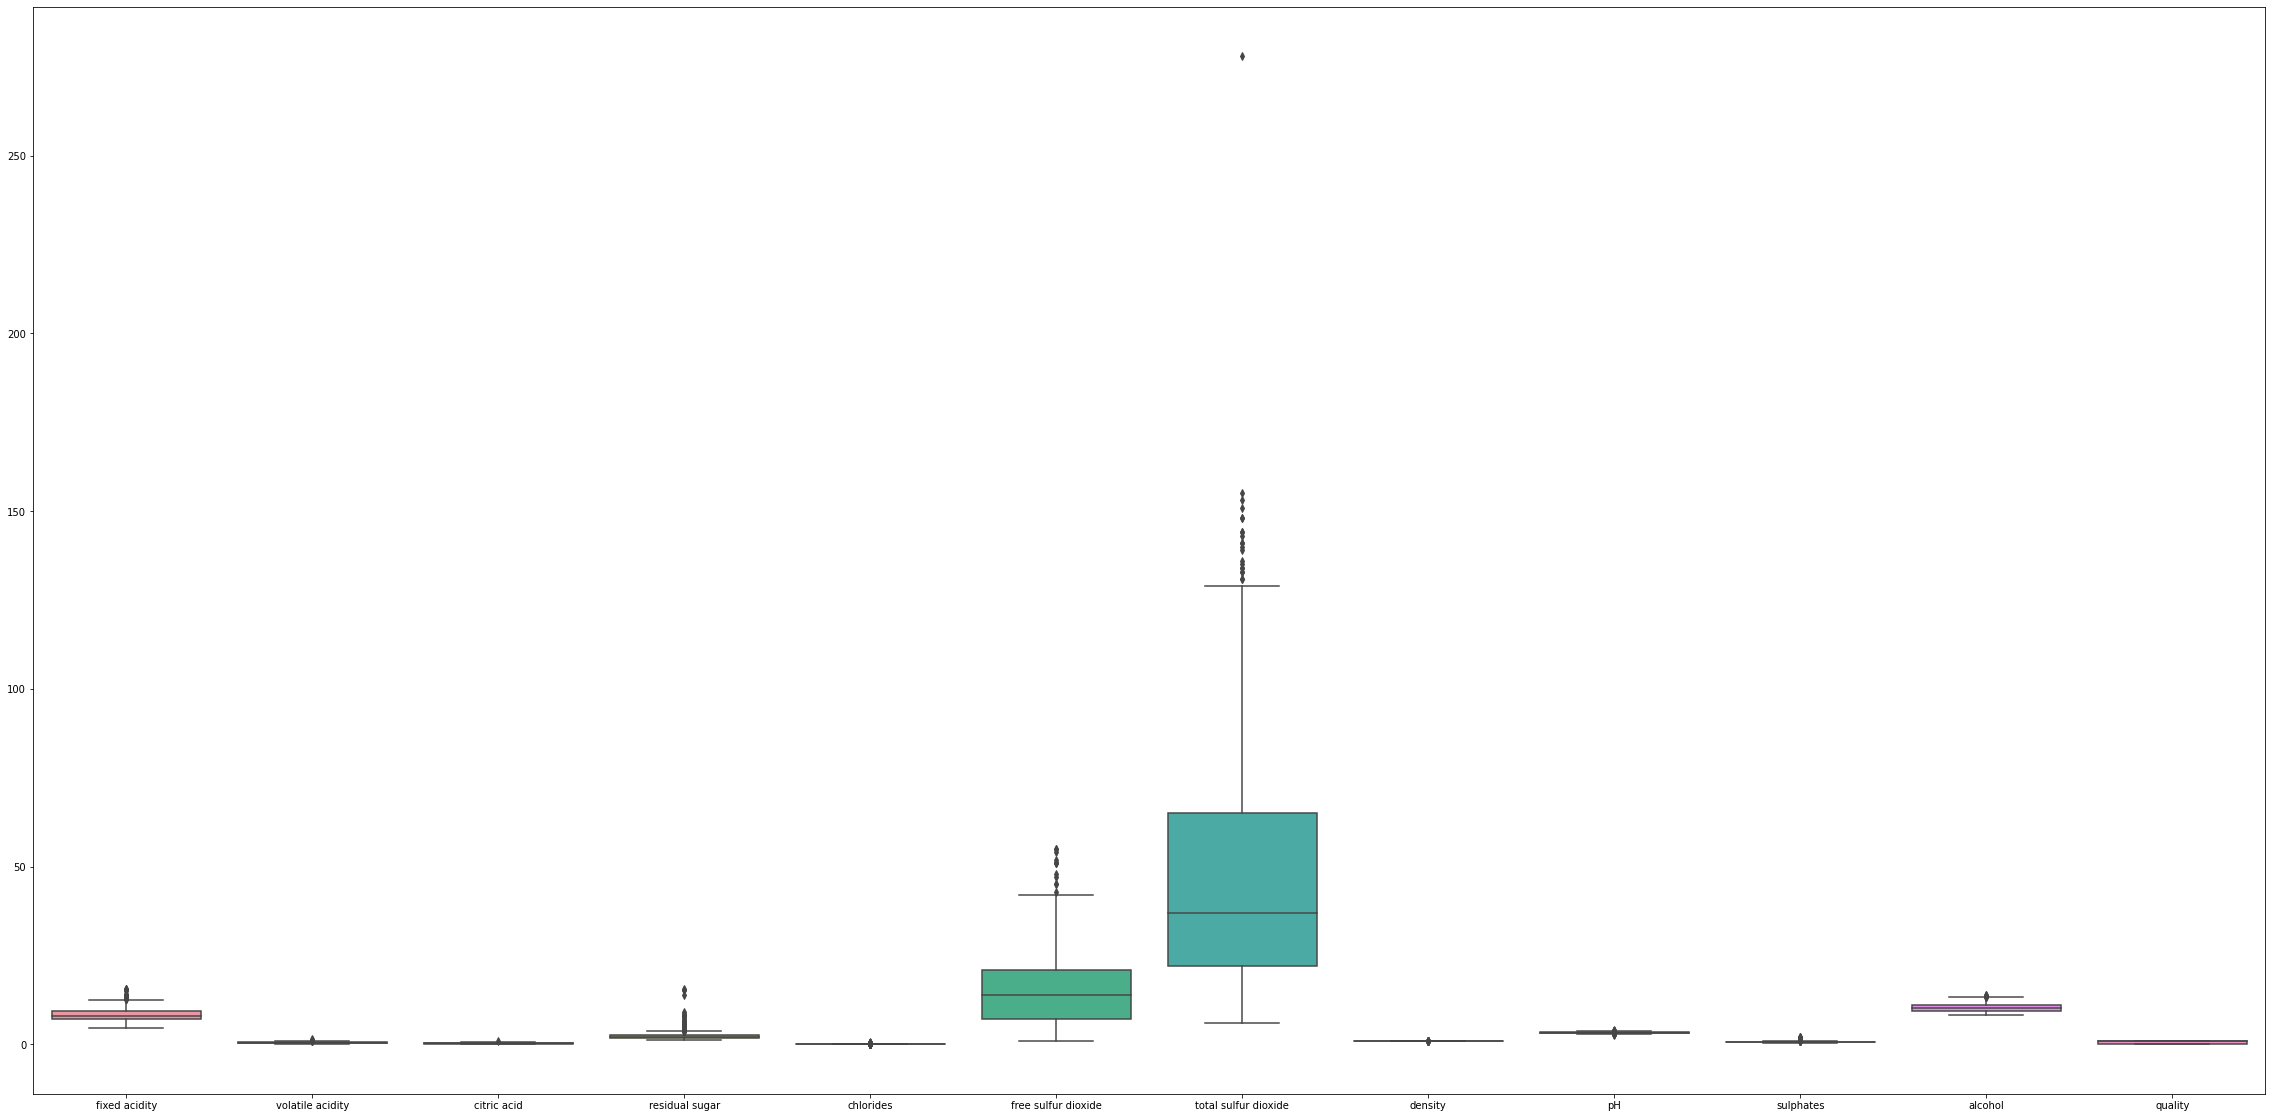

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(40,20))
sns.boxplot(data=wine_data)

There are outliers but for now I will not do any manipulation on this data!!

In [8]:
q1=wine_data.quantile(0.25)
q2=wine_data.quantile(0.72)
IQR=q2-q1
print(IQR)

fixed acidity            2.000000
volatile acidity         0.235000
citric acid              0.330000
residual sugar           0.700000
chlorides                0.018000
free sulfur dioxide     13.000000
total sulfur dioxide    39.000000
density                  0.002075
pH                       0.180000
sulphates                0.170000
alcohol                  1.400000
quality                  1.000000
dtype: float64


The test data in test.csv, and whatever test set you split off, is data that you "have never seen before". If you've never seen it, the you can't remove outliers from it, because to remove outliers means that you have the data and can analyze it. Hence I will not remocve outliers

Since I will be attempting to use K Neighbors classifiers I will implement normalization, all the nearest neighbors are aligned in the direction of the axis with the smaller range

I will proceed with randomizing dataset

In [9]:
#Shuffling Data
wine_data = wine_data.sample(frac=1).reset_index(drop=True)

DATA PREPARATION

In [10]:
#DATA PREPARATION
x_data = wine_data.drop(["quality"],axis=1)
x = x_data
y = wine_data['quality'].values

Text(0, 0.5, 'Testing Accuracy')

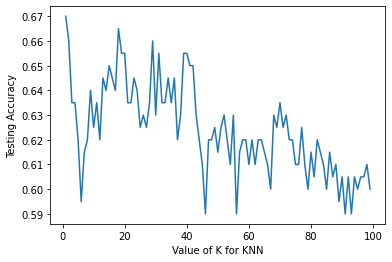

In [11]:
#UNDESRTANDING K NEIGHBORS test accuracy
k_range = range(1, 100)

# We can create Python dictionary using [] or dict()
scores = []

# We use a loop through the range 1 to 26
# We append the scores in the dictionary
for k in k_range:
    x_train,x_test,y_train,y_test = train_test_split(x, y, stratify = y, random_state = 42)
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    scores.append(accuracy_score(y_test, y_pred))
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

Normalization is a good technique to use when you do not know the distribution of your data or when you know the distribution is not Gaussian (a bell curve). Normalization is useful when your data has varying scales and the algorithm you are using does not make assumptions about the distribution of your data, such as k-nearest neighbors and artificial neural networks.

The StandardScaler assumes your data is normally distributed within each feature. By "removing the mean and scaling to unit variance", you can see in the picture now they have the same "scale" regardless of its original one.

I have to rescale the sample with MinMaxSCALER inside of pipeline




The pipeline consists of a list of steps involved where each of them is described as a tuple which has a string that has the name for the step and an instance of the class.

BEST F1 pipeline 0.8055555555555556


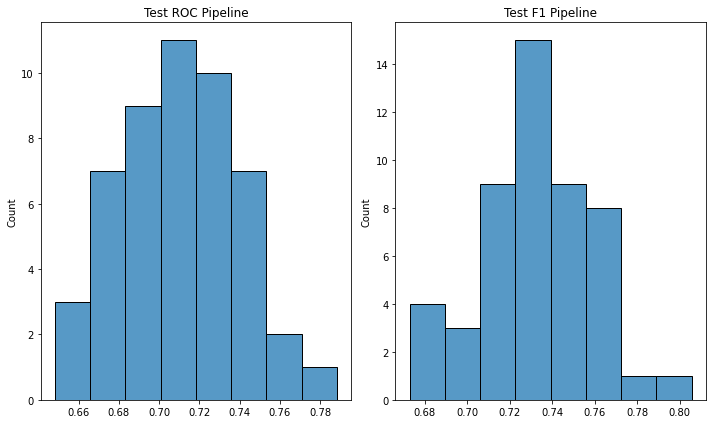

In [12]:
#PIPELINE DEFAULT DISTRIBUTION MODEL
test_roc = []
test_f1= []
best_f1 = 0

for j in range(50):
  x_train,x_test,y_train,y_test = train_test_split(x, y, stratify = y)

  pipe = make_pipeline(preprocessing.MinMaxScaler(), neighbors.KNeighborsClassifier())
  pipe = pipe.fit(x_train, y_train)
  y_pred = pipe.predict(x_test)

  test_roc.append(roc_auc_score(y_test, y_pred))
  test_f1.append(f1_score(y_test, y_pred.round()))

  if(best_f1 < f1_score(y_test, y_pred.round())):
    best_f1 = f1_score(y_test, y_pred.round())
    Best_pipe = pipe

f, axs = plt.subplots(1, 2, figsize=(10, 6))
axs[0].set_title("Test ROC Pipeline")
axs[1].set_title("Test F1 Pipeline")
sns.histplot(test_roc, ax = axs[0])
sns.histplot(test_f1, ax = axs[1])
f.tight_layout()
print("BEST F1 pipeline", best_f1)

I see that data median lies between 75 media for F1 , lets now try with gridsearch based on pipe model with best f1

PARAMETER SEARCH - Hyperparameter Tuning-Grid Search-Cross Validation

BEST F1 Gridsearch 0.878048780487805


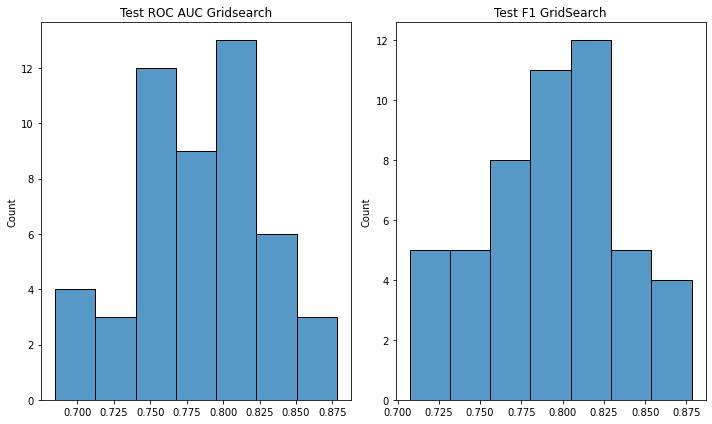

In [13]:
#HYPERPARAMETER SEARCH DISTRIBUTION MODEL with GridSearch Cross Validation
test_roc = []
test_f1= []
best_f1 = 0

for j in range(50):
  x_train,x_test,y_train,y_test = train_test_split(x, y, stratify = y, test_size = 0.1)

  search_params = {"kneighborsclassifier__n_neighbors": range(1,100,2),
                   "kneighborsclassifier__weights": ['distance']}

  model = RandomizedSearchCV(Best_pipe, search_params, cv = StratifiedKFold(10))

  model = model.fit(x_train, y_train)
  y_pred = model.predict(x_test)

  test_roc.append(roc_auc_score(y_test, y_pred))
  test_f1.append(f1_score(y_test, y_pred.round()))

  if(best_f1 < f1_score(y_test, y_pred.round())):
    best_f1 = f1_score(y_test, y_pred.round())
    model = model.best_estimator_

f, axs = plt.subplots(1, 2, figsize=(10, 6))
axs[0].set_title("Test ROC AUC Gridsearch")
axs[1].set_title("Test F1 GridSearch")
sns.histplot(test_roc, ax = axs[0])
sns.histplot(test_f1, ax = axs[1])
f.tight_layout()
print("BEST F1 Gridsearch", best_f1)

I am having a model with a better median for f1 score of around 80 which is much better thank to the hyperparameter search

I HAVE NOW THE BEST ESTIMATOR, THIS MEANS THAT THIS IS THE PARAMETERS I WILL USE WHEN PREDICTING AGAINST TEST DATA

In [14]:
y_pred = model.predict(test_data)
output = pd.DataFrame({'id': np.arange(0,800), 'quality': y_pred})
output = output.set_index('id')
output['quality'] = y_pred
output.to_csv("submission.csv")
output

,quality
id,
0,0
1,0
2,0
3,1
4,1
...,...
795,0
796,1
797,1
